In [1]:
# Importing Packages
import numpy as np
from matplotlib import pyplot
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Flatten, Dense
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape, "____" , X_test.shape, y_test.shape

((60000, 28, 28), (60000,), '____', (10000, 28, 28), (10000,))

In [4]:
y_train[0]

9

In [5]:
class_labels = ["Trouser", "Pullover" , "Dress" , "Coat" , "Sandal" , "Shirt" , "Sneaker" , "Bag" ,  "Ankle boot"]
class_labels

['Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

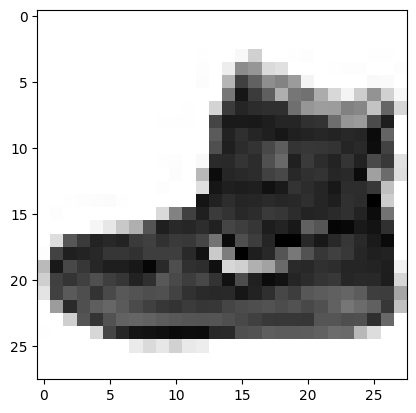

In [6]:
plt.imshow(X_train[0] , cmap="Greys")

Text(0.5, 1.0, 'Bag / 7')

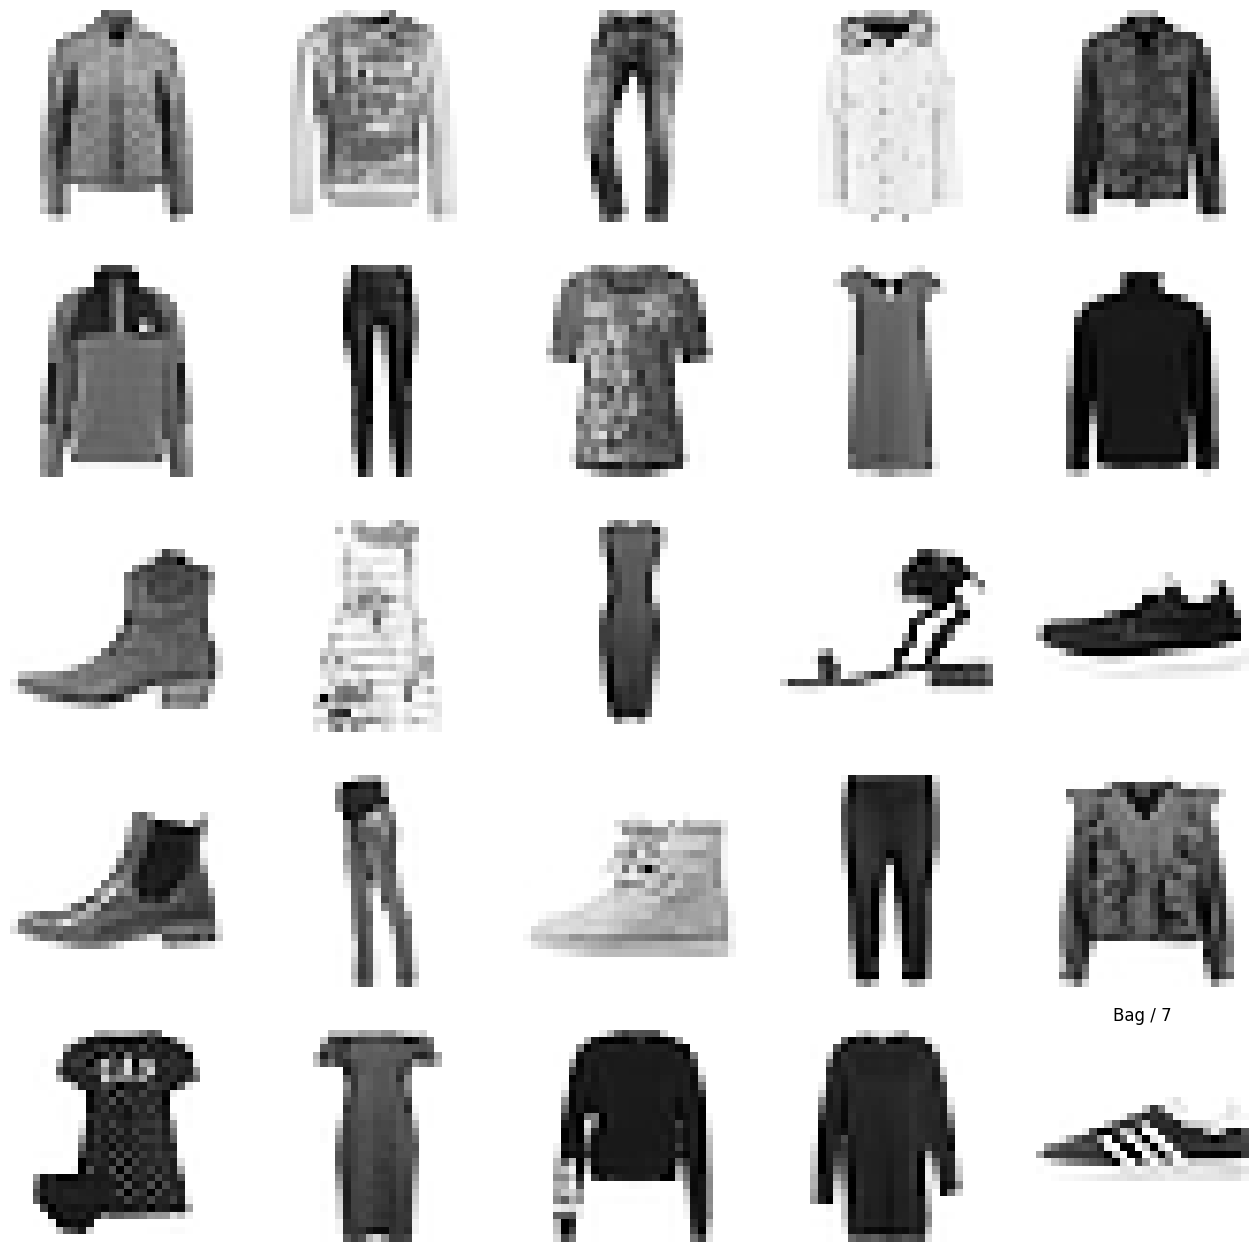

In [7]:
plt.figure(figsize=(16,16))
j=1
for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j)
  j+=1
  plt.imshow(X_train[i],cmap="Greys")
  plt.axis('off')
plt.title('{} / {}'.format(class_labels[y_train[i]], y_train[i]))

In [8]:
X_train. shape

(60000, 28, 28)

In [9]:
X_train.ndim

3

In [10]:
X_train = np.expand_dims(X_train, -1)
X_test =np.expand_dims(X_test, -1)

In [11]:
X_train.ndim

4

In [12]:
X_train =X_train/255
X_test = X_test/255

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size= 0.2, random_state=2020)

In [14]:
X_train.shape, y_train.shape, X_validation.shape, y_validation.shape

((48000, 28, 28, 1), (48000,), (12000, 28, 28, 1), (12000,))

In [15]:
cnn = keras.models.Sequential([
    
    tf.keras.layers.Conv2D(filters=32, kernel_size=3,strides=(1,1),padding='valid', activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3,strides=(2,2),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])


In [16]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [18]:
train = cnn.fit(X_train, y_train, epochs=5 , batch_size=16 , verbose=1 , validation_data=(X_validation, y_validation))

Epoch 1/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.2715 - accuracy: 0.9009 - val_loss: 0.2953 - val_accuracy: 0.8960
Epoch 2/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.2567 - accuracy: 0.9073 - val_loss: 0.2860 - val_accuracy: 0.8996
Epoch 3/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.2402 - accuracy: 0.9105 - val_loss: 0.3010 - val_accuracy: 0.8944
Epoch 4/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.2338 - accuracy: 0.9140 - val_loss: 0.2905 - val_accuracy: 0.9022
Epoch 5/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.2222 - accuracy: 0.9192 - val_loss: 0.2839 - val_accuracy: 0.9020


In [19]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2960 - accuracy: 0.8996


[0.29604607820510864, 0.8996000289916992]

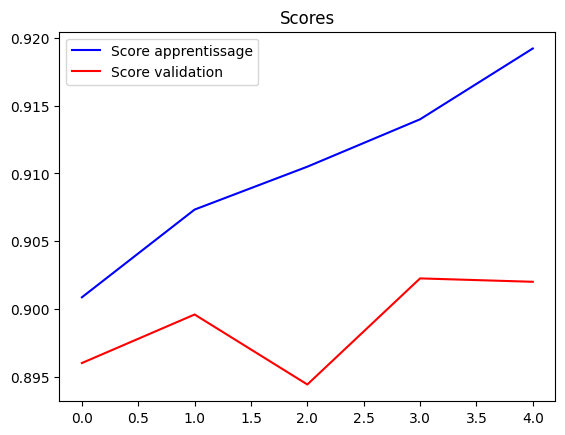

In [20]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()
plot_scores(train)

In [21]:
y_pred = cnn.predict(X_test)
y_pred

array([[5.70915716e-18, 2.74046859e-15, 4.50644355e-15, ...,
        5.77559192e-08, 6.02149320e-12, 9.99999881e-01],
       [1.03647344e-05, 2.87328994e-10, 9.97923970e-01, ...,
        1.45802401e-18, 4.76185180e-09, 2.69693745e-13],
       [8.71007619e-18, 1.00000000e+00, 2.27187349e-14, ...,
        4.55674907e-37, 1.22337490e-17, 4.20138337e-29],
       ...,
       [1.28275401e-09, 5.46880588e-19, 4.98397532e-15, ...,
        4.28959268e-08, 1.00000000e+00, 7.95642632e-12],
       [6.14032425e-13, 1.00000000e+00, 5.45278822e-11, ...,
        1.05939236e-26, 1.95576465e-13, 4.86386643e-21],
       [1.14920571e-04, 1.99343981e-06, 5.62311743e-06, ...,
        9.56115499e-03, 3.34692042e-04, 5.70931064e-04]], dtype=float32)

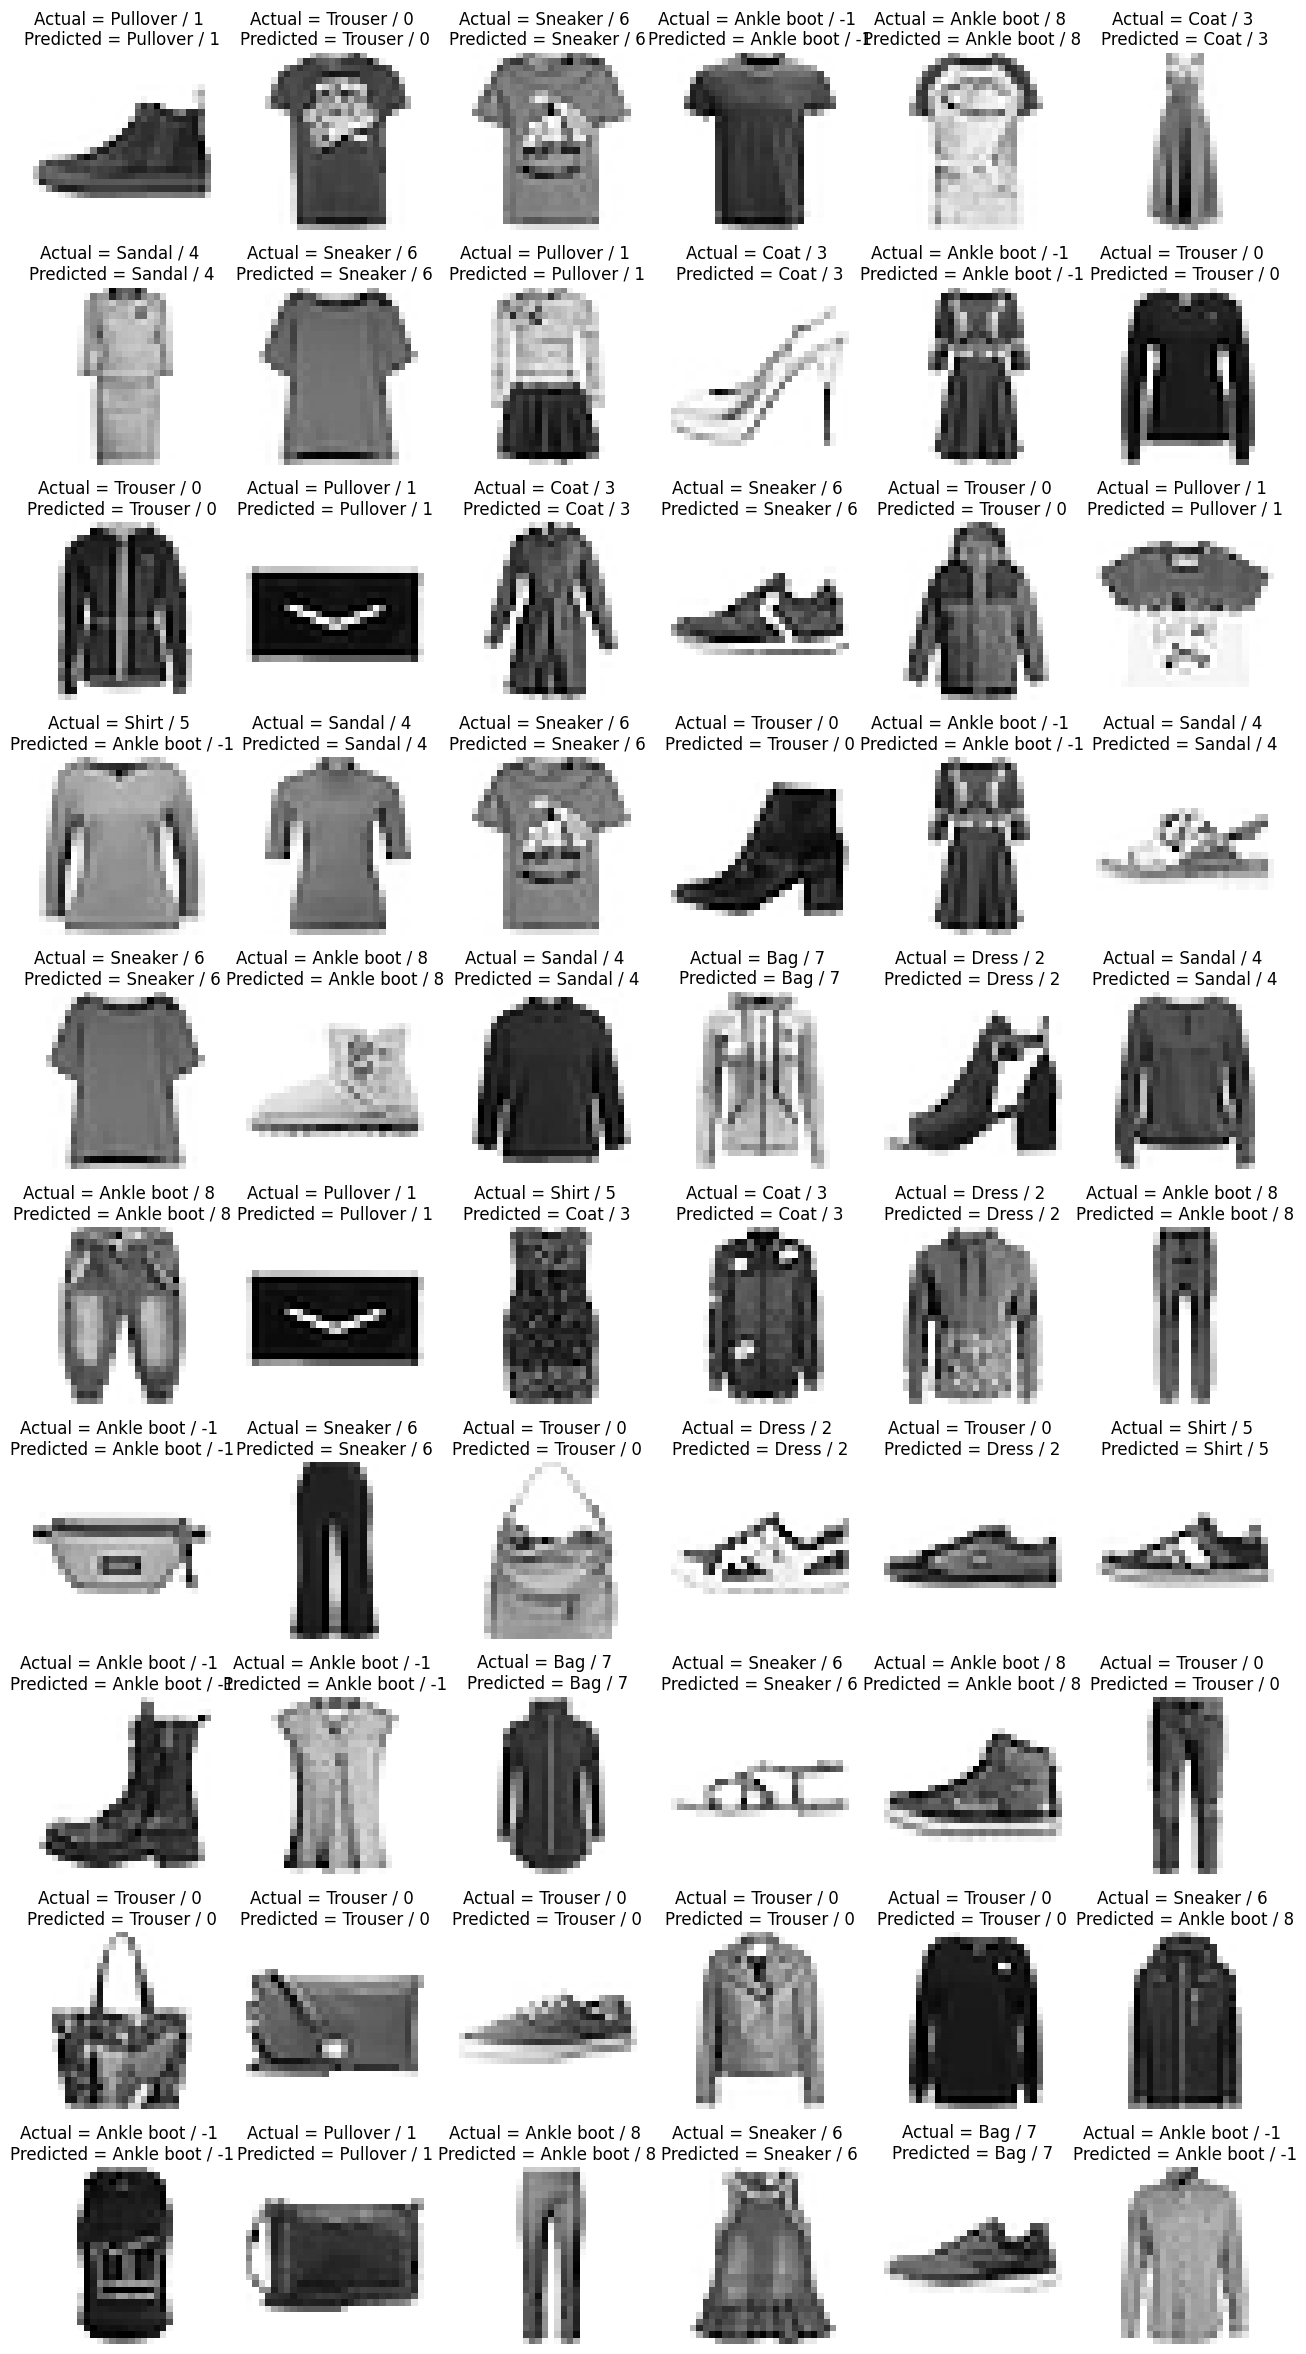

In [22]:
plt.figure(figsize=(16,30))
j=1
for i in np.random.randint(0,1000,60):
  plt.subplot(10,6,j)
  j+=1
  plt.imshow(X_train[i].reshape(28,28),cmap='Greys')
  plt.axis('off')
  plt.title('Actual = {} / {} \nPredicted = {} / {}'.format(class_labels[y_test[i]-1], y_test[i]-1, class_labels[np.argmax(y_pred[i])-1],np.argmax(y_pred[i])-1))

<AxesSubplot: >

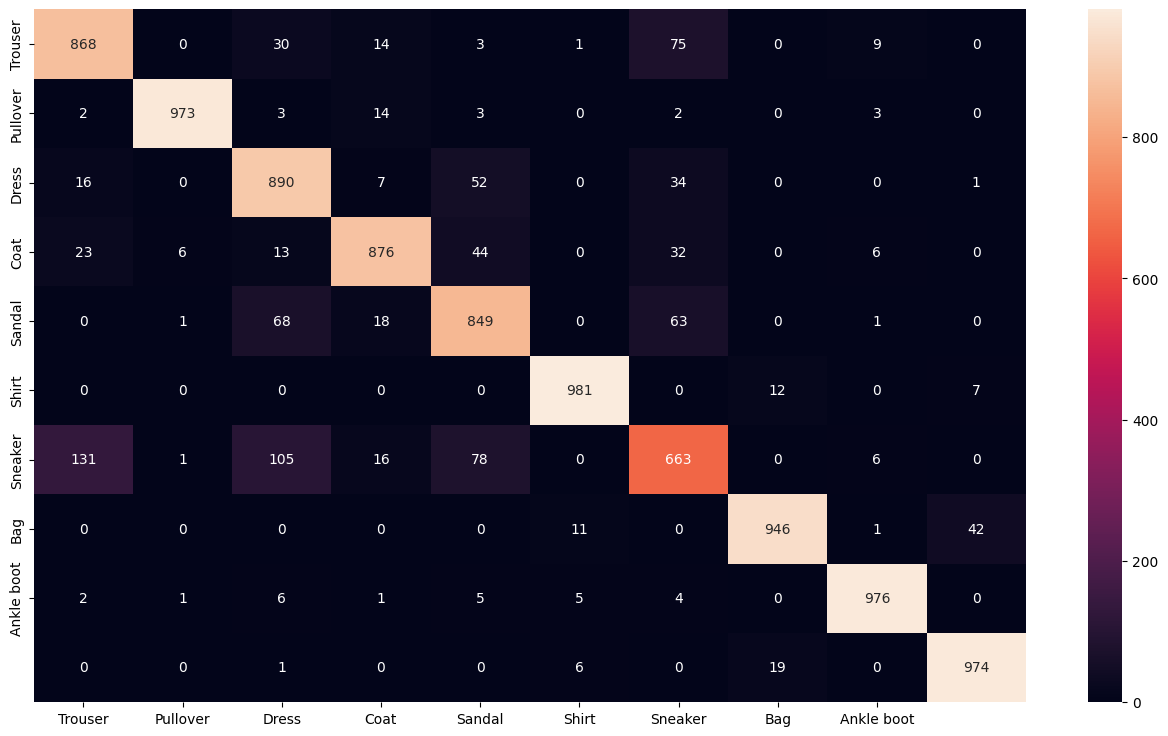

In [23]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(16,9))
y_pred_labels = [np.argmax(label) for label in y_pred ]
cm = confusion_matrix(y_test , y_pred_labels)

sns.heatmap(cm , annot=True , fmt='d' , xticklabels=class_labels , yticklabels=class_labels)

In [24]:
from sklearn.metrics import classification_report
cr = classification_report(y_test , y_pred_labels)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.97      0.98      1000
           2       0.80      0.89      0.84      1000
           3       0.93      0.88      0.90      1000
           4       0.82      0.85      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.76      0.66      0.71      1000
           7       0.97      0.95      0.96      1000
           8       0.97      0.98      0.98      1000
           9       0.95      0.97      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

